In [119]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

import pickle

import logging
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import numpy as np
import os
from pathlib import Path
import random
import matplotlib.pyplot as plt
import shap
import csv


# user defined methods
import sys
sys.path.append('../utils')

from threshold_analysis import read_cheap_features, set_threshold, split_data, tunelr, tunerf, tunesvc,tunedt, tunexgb, oversample_data
from preprocessing import convert_to_int

In [59]:
output = read_cheap_features('Ant_Dem_Lif.csv', "hf15")

In [60]:
output

,gender,race,mstat,hip,neck20,coffee15,tea15,soda15,evsmok15,smknow15,...,bmi_s1,educat,weight,waist,height,weight20,age_category_s1,nsrrid,ahi_c0h4,hf15
0,1.0,1.0,1.0,99.0,38.3,2.0,0.0,1.0,1.0,0.000000e+00,...,21.777553,3.0,65.0,86.0,178.0,69.0,7.0,200001.0,1.278296,0.0
1,1.0,1.0,1.0,122.0,40.5,0.0,0.0,0.0,0.0,2.000000e-01,...,32.950680,2.0,93.0,107.0,168.0,93.0,9.0,200002.0,14.505495,0.0
2,2.0,1.0,3.0,95.0,39.0,0.0,3.0,0.0,0.0,2.000000e-01,...,24.114150,3.0,51.0,82.0,145.0,50.7,9.0,200003.0,4.184100,0.0
3,1.0,1.0,1.0,99.0,39.2,0.0,0.0,0.0,0.0,2.000000e-01,...,20.185185,3.0,64.0,85.0,180.0,65.4,6.0,200004.0,0.199336,0.0
4,2.0,2.0,3.0,97.0,32.0,1.0,1.0,0.0,1.0,0.000000e+00,...,23.309053,2.0,56.0,76.0,155.0,56.0,8.0,200005.0,2.756757,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,1.0,1.0,1.0,95.0,41.5,2.0,0.0,0.0,0.0,2.000000e-01,...,25.693134,2.0,70.5,99.0,166.0,70.8,8.0,205800.0,10.743551,0.0
5800,1.0,1.0,1.0,99.0,34.9,6.0,0.0,1.0,1.0,1.000000e+00,...,26.730372,3.0,83.6,99.0,176.0,82.8,6.0,205801.0,13.198483,0.0
5801,1.0,1.0,1.0,101.0,37.0,10.0,0.0,1.0,0.0,2.000000e-01,...,24.228571,4.0,75.0,91.0,175.0,74.2,7.0,205802.0,2.019231,0.0
5802,1.0,1.0,1.0,98.0,39.0,0.0,0.0,1.0,0.0,2.775558e-17,...,25.374483,2.0,76.8,93.0,176.0,78.6,6.0,205803.0,1.186650,0.0


# dataset: ahi_c0h4 = 1

In [77]:
set_threshold(output)

'completed'

In [85]:
best_dataset, best_model, results = find_threshold('ProcessedData4/')

C:\Users\minyu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=15. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ahic0h4_threshold_1.csv LogisticRegression(C=0.01, class_weight='balanced', random_state=1) 0.6337555008156128 0.6562369745147076 [[834 463]
 [491 817]] 463
ahic0h4_threshold_1.csv RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=90,
                       min_samples_split=5, n_estimators=292, random_state=1) 0.9915544784801564 0.982721714865781 [[1296    1]
 [  21 1287]] 1
ahic0h4_threshold_1.csv DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, min_samples_leaf=2, random_state=1) 0.9669867005180315 0.9572264216682388 [[1256   41]
 [  45 1263]] 41
ahic0h4_threshold_1.csv XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=N

C:\Users\minyu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=15. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ahic0h4_threshold_2.csv LogisticRegression(C=1, class_weight='balanced', random_state=1) 0.6692522863619434 0.6893812412861063 [[664 388]
 [319 770]] 388
ahic0h4_threshold_2.csv RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=90,
                       min_samples_split=5, n_estimators=292, random_state=1) 0.989258111037167 0.9859878117660991 [[1052    0]
 [  23 1066]] 0
ahic0h4_threshold_2.csv DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=90, min_samples_leaf=4, min_samples_split=10,
                       random_state=1) 0.9673059393919365 0.9589635659443075 [[1019   33]
 [  37 1052]] 33
ahic0h4_threshold_2.csv XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma

C:\Users\minyu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=15. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ahic0h4_threshold_3.csv LogisticRegression(C=0.01, class_weight='balanced', random_state=1) 0.644027467287018 0.6422855201091437 [[564 334]
 [308 598]] 334
ahic0h4_threshold_3.csv RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=90,
                       min_samples_split=5, n_estimators=292, random_state=1) 0.9839235795666507 0.9881235154394299 [[893   5]
 [ 24 882]] 5
ahic0h4_threshold_3.csv DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=80, min_samples_leaf=4, random_state=1) 0.961749864640758 0.9536592250661017 [[859  39]
 [ 30 876]] 39
ahic0h4_threshold_3.csv XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
    

C:\Users\minyu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=15. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\minyu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ahic0h4_threshold_4.csv LogisticRegression(C=0.001, class_weight='balanced', random_state=1) 0.6710048171649889 0.6839160839160839 [[526 250]
 [254 502]] 250
ahic0h4_threshold_4.csv RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=90,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=666, random_state=1) 0.9862899215014008 0.9888129010348964 [[772   4]
 [ 17 739]] 4
ahic0h4_threshold_4.csv DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, min_samples_split=10, random_state=1) 0.954962735407551 0.9509813472167079 [[737  39]
 [ 30 726]] 39
ahic0h4_threshold_4.csv XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=Non

C:\Users\minyu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=15. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\minyu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ahic0h4_threshold_5.csv LogisticRegression(C=10, class_weight='balanced', random_state=1) 0.6673910677023764 0.6882808862085126 [[433 226]
 [212 446]] 226
ahic0h4_threshold_5.csv RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=76,
                       min_samples_split=5, n_estimators=348, random_state=1) 0.9848126051814976 0.978866707587853 [[655   4]
 [ 16 642]] 4
ahic0h4_threshold_5.csv DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, min_samples_leaf=2, random_state=1) 0.9612721432630285 0.9414491561674068 [[627  32]
 [ 19 639]] 32
ahic0h4_threshold_5.csv XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
     

C:\Users\minyu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=15. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\minyu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ahic0h4_threshold_6.csv RandomForestClassifier(class_weight='balanced', max_depth=38,
                       max_features='auto', n_estimators=835, random_state=1) 0.9858392874587057 0.9829289769428616 [[573   6]
 [ 10 541]] 6
ahic0h4_threshold_6.csv DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, min_samples_split=10, random_state=1) 0.9557555405314594 0.954474317586272 [[552  27]
 [ 23 528]] 27
ahic0h4_threshold_6.csv XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, 

C:\Users\minyu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=15. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ahic0h4_threshold_7.csv RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=28,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=762, random_state=1) 0.9856935654599682 0.9868742931334497 [[503   2]
 [ 12 462]] 2
ahic0h4_threshold_7.csv DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, min_samples_split=10, random_state=1) 0.9571095566503875 0.9584045624958738 [[475  30]
 [ 12 462]] 30
ahic0h4_threshold_7.csv XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None

C:\Users\minyu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=15. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ahic0h4_threshold_8.csv RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=90,
                       min_samples_split=5, n_estimators=292, random_state=1) 0.9775936853017689 0.9823056525279745 [[416   6]
 [ 13 413]] 6
ahic0h4_threshold_8.csv DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, min_samples_leaf=2, random_state=1) 0.9575471698113207 0.9621000840266749 [[404  18]
 [ 18 408]] 18
ahic0h4_threshold_8.csv XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_de

C:\Users\minyu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=15. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\minyu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ahic0h4_threshold_9.csv RandomForestClassifier(class_weight='balanced', max_depth=38,
                       max_features='auto', n_estimators=835, random_state=1) 0.9839174475546314 0.9856289612203245 [[360   2]
 [ 10 374]] 2
ahic0h4_threshold_9.csv DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, min_samples_split=10, random_state=1) 0.9504129308871666 0.9683973636651324 [[349  13]
 [ 24 360]] 13
ahic0h4_threshold_9.csv XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None,

In [86]:
best_dataset, best_model

('ahic0h4_threshold_2.csv',
 RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=90,
                        min_samples_split=5, n_estimators=292, random_state=1))

Get feature importance

In [23]:
feature_importances = feature_importance('ahic0h4_threshold_2.csv', RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=90,
                        min_samples_split=5, n_estimators=292, random_state=1))

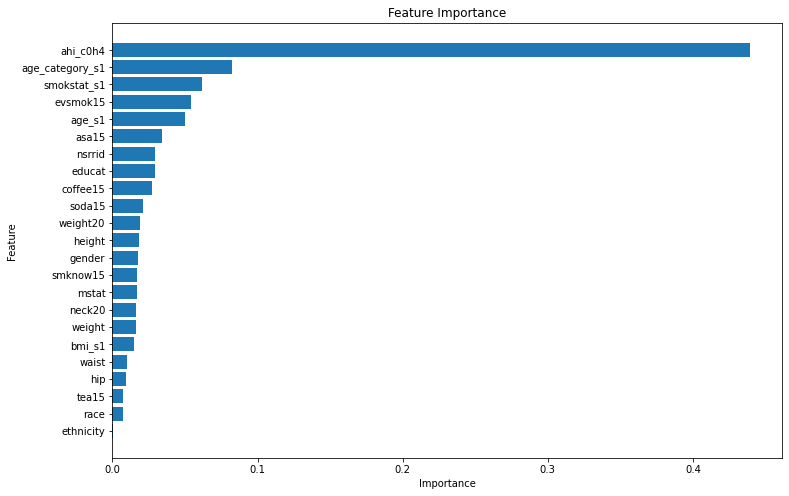

In [88]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [151]:
path = 'ProcessedData4/' + best_dataset
df = pd.read_csv(path)
df['hf15'] = df['hf15'].astype(int)
features = df.columns.tolist()
features.remove('hf15')
X, y = oversample_data(df, features, 'hf15')
data = pd.concat([X, y], axis=1)

X_train, X_test, y_train, y_test, X_val, y_val = split_data(data, features, 'hf15')
model = RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=90,
                        min_samples_split=5, n_estimators=292, random_state=1)
model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model, X_test)
shap_values = explainer(X_test, check_additivity=False)


 99%|===================| 4257/4282 [02:48<00:00]        

In [152]:
shap_values.shape

(2141, 23, 2)

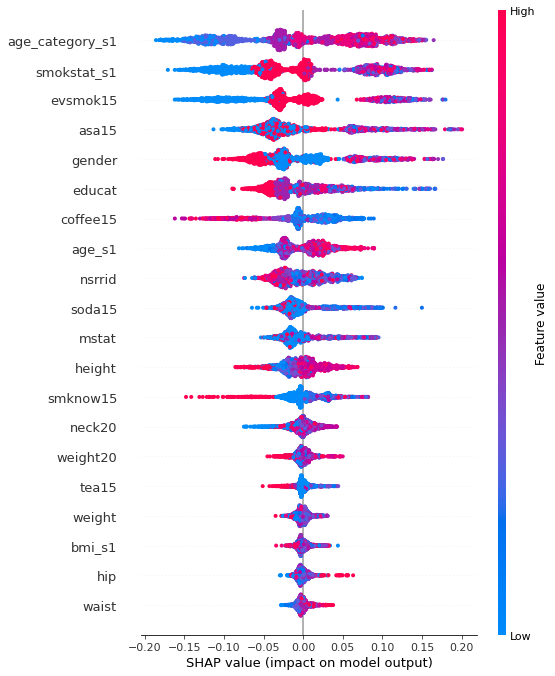

In [155]:
shap.summary_plot(shap_values[:, :, 1], X_test)

In [28]:
csv_file = 'model_results.csv'

# Field names (column headers)
field_names = ['File', 'Model', 'F1 Test', 'F1 Validation', 'Confusion Matrix', 'False Negative']

# Writing to csv file
with open(csv_file, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=field_names)

    # Write the headers
    writer.writeheader()

    # Write the data rows
    for result in results:
        writer.writerow(result)